In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas_profiling
from ast import literal_eval

# Analysis H0 and Scrapping Google Trends

Hypothesis: Between the years of 2009 and 2018 the number of mentions of tofu recipes increased significantly

H0: median random sample = median population


Sources justifying whi analyzing tofu: 
https://www.foodnavigator.com/Article/2020/04/28/Heura-CEO-on-the-future-of-plant-based-R-D-Clean-label-nutrition-and-price
https://www.foodnavigator-usa.com/Article/2020/08/03/Tofu-s-time-has-come-says-Nasoya-It-s-the-simplest-form-of-plant-based-protein-on-the-market

In [2]:
recipes = pd.read_csv(r'\Users\marcp\Desktop\Ironhack\Clases\FINAL PROJECT\Project 2\clean_RAW_recipes.csv')

In [3]:
recipes

,Unnamed: 0,name,id,minutes,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,healthy
0,115,1 in canada chocolate chip cookies,453467,45,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,2011,595.1,46.0,211.0,22.0,13.0,51.0,26.0,False
1,125,2000 meatloaf,475785,90,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,2012,267.0,30.0,12.0,12.0,29.0,48.0,2.0,False
2,135,blepandekager danish apple pancakes,503475,50,2013-07-08,"['danish', '60-minutes-or-less', 'time-to-make...",10,"['beat the eggs lightly and add the milk', 'co...",this recipe has been posted here for play in z...,"['eggs', 'milk', 'flour', 'sugar', 'salt', 'cr...",10,2013,358.2,30.0,62.0,14.0,19.0,54.0,12.0,False
3,136,lplermagrone,522861,50,2015-07-25,"['60-minutes-or-less', 'time-to-make', 'course...",10,['a variant on the theme: in the swiss canton ...,älplermagronethe name doesn't translate perfec...,"['milk', 'salt', 'macaroni', 'cheese', 'fresh ...",8,2015,1003.8,72.0,21.0,103.0,69.0,143.0,37.0,False
4,137,lplermagrone herdsman s macaroni,457136,40,2011-05-23,"['60-minutes-or-less', 'time-to-make', 'course...",14,"['heat the oven to 100 c', 'boil potatoes in a...",basic ingredients for swiss alpine macaroni in...,"['potato', 'salt water', 'macaroni', 'heavy cr...",10,2011,708.6,52.0,19.0,24.0,46.0,104.0,25.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34487,231606,zurich ragout zrcher geschnetzeltes,455538,35,2011-05-09,"['60-minutes-or-less', 'time-to-make', 'course...",11,['melt 1 tablespoon clarified butter over high...,i originally found this on the about.com websi...,"['veal', 'veal kidneys', 'clarified butter', '...",13,2011,278.8,22.0,5.0,12.0,38.0,39.0,2.0,False
34488,231612,zurie s tomato and cream cheese tart,400445,60,2009-11-20,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,2009,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False
34489,231615,zuvers barbecue sauce,381216,30,2009-07-13,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,2009,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False
34490,231627,zwiebelwhe swiss onion tart,410985,165,2010-01-30,"['weeknight', 'time-to-make', 'course', 'main-...",38,"['crust:', 'pulse flour , baking powder , and ...",a delicious bacon-studded tart.,"['flour', 'baking powder', 'kosher salt', 'uns...",13,2010,440.1,49.0,15.0,10.0,22.0,90.0,9.0,False


In [4]:
recipes.dtypes

Unnamed: 0         int64
name              object
id                 int64
minutes            int64
submitted         object
tags              object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
year               int64
calories         float64
total_fat        float64
sugar            float64
sodium           float64
protein          float64
saturated_fat    float64
carbohydrates    float64
healthy             bool
dtype: object

In [5]:
recipes.drop(['healthy'], axis = 1, inplace = True)

# 1.1 Exploring recipes w/ kale ingredient

In [6]:
recipes['kale'] = ['kale' in tag for tag in recipes['ingredients']]
recipes_tags = recipes.drop(columns=['name', 'tags', 'steps', 'description'])
recipes_tags.head(2)

,Unnamed: 0,id,minutes,submitted,n_steps,ingredients,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,kale
0,115,453467,45,2011-04-11,12,"['white sugar', 'brown sugar', 'salt', 'margar...",11,2011,595.1,46.0,211.0,22.0,13.0,51.0,26.0,False
1,125,475785,90,2012-03-06,17,"['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,2012,267.0,30.0,12.0,12.0,29.0,48.0,2.0,False


In [7]:
df1 = recipes_tags.groupby(['year']).agg({'id':'count','kale':'sum'})
df1 = df1.assign(ratio = df1['kale']/df1['id'])

In [8]:
df1.reset_index()

,year,id,kale,ratio
0,2009,14519,44.0,0.003031
1,2010,7705,31.0,0.004023
2,2011,4897,21.0,0.004288
3,2012,3446,15.0,0.004353
4,2013,2523,22.0,0.008720
5,2014,715,10.0,0.013986
6,2015,213,3.0,0.014085
7,2016,133,2.0,0.015038
8,2017,197,1.0,0.005076
9,2018,144,0.0,0.000000


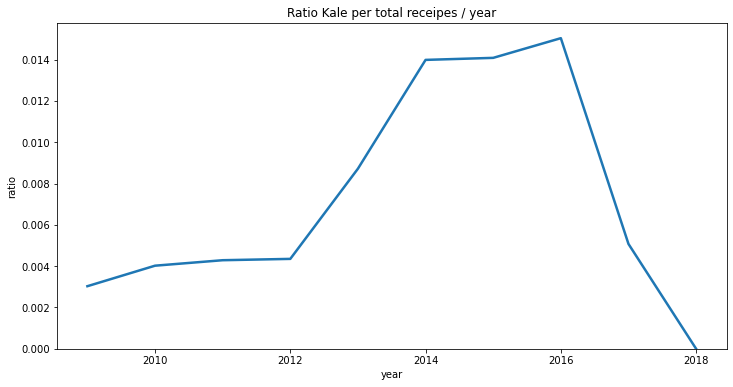

In [9]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df1, x='year', y='ratio', linewidth=2.5)
ax.set(ylim=(0, None))
ax.set_title('Ratio Kale per total receipes / year')
ax

# 1.2 Exploring recipes w/tofu ingredients H0

In [10]:
recipes['tofu'] = ['tofu' in tag for tag in recipes['ingredients']]
recipes_ingredients_2 = recipes.drop(columns=['tags', 'steps', 'description'])
recipes_ingredients_2.head(2)

,Unnamed: 0,name,id,minutes,submitted,n_steps,ingredients,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,kale,tofu
0,115,1 in canada chocolate chip cookies,453467,45,2011-04-11,12,"['white sugar', 'brown sugar', 'salt', 'margar...",11,2011,595.1,46.0,211.0,22.0,13.0,51.0,26.0,False,False
1,125,2000 meatloaf,475785,90,2012-03-06,17,"['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,2012,267.0,30.0,12.0,12.0,29.0,48.0,2.0,False,False


In [11]:
df2 = recipes_ingredients_2.groupby(['year']).agg({'id':'count','tofu':'sum'})
df2 = df2.assign(ratio = df2['tofu']/df2['id'])

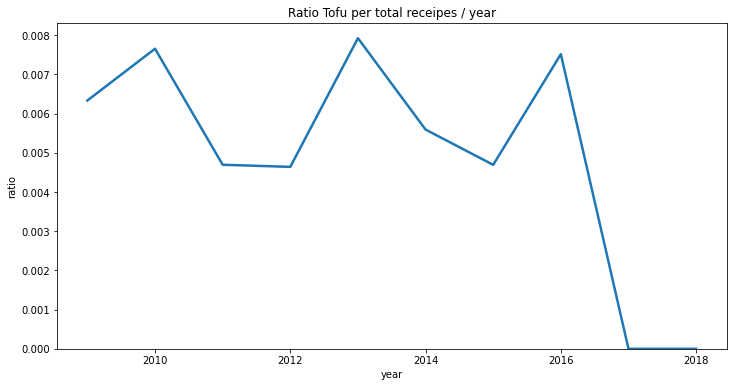

In [12]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df2, x='year', y='ratio', linewidth=2.5)
ax.set(ylim=(0, None))
ax.set_title('Ratio Tofu per total receipes / year')
ax

# 1.3 Exploring w/vegetarian tags

In [13]:
recipes['vegetarian'] = ['vegetarian' in tag for tag in recipes['tags']]
recipes_ingredients_3 = recipes.drop(columns=['name', 'ingredients', 'steps', 'description'])
recipes_ingredients_3.head(2)

,Unnamed: 0,id,minutes,submitted,tags,n_steps,n_ingredients,year,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,kale,tofu,vegetarian
0,115,453467,45,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...",12,11,2011,595.1,46.0,211.0,22.0,13.0,51.0,26.0,False,False,False
1,125,475785,90,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...",17,13,2012,267.0,30.0,12.0,12.0,29.0,48.0,2.0,False,False,False


In [14]:
df3 = recipes_ingredients_3.groupby(['year']).agg({'id':'count','vegetarian':'sum'})
df3 = df3.assign(ratio = df3['vegetarian']/df3['id'])

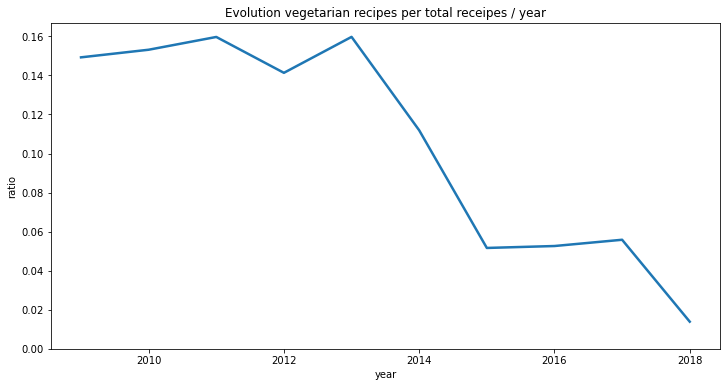

In [15]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df3, x='year', y='ratio', linewidth=2.5)
ax.set(ylim=(0, None))
ax.set_title('Evolution vegetarian recipes per total receipes / year')
ax

The rate drops heavily through the years, but we don't refuse the H0, as we firmly believe that the drop in vegetarian rate dishes is not to the lack of interest, if not it's the beahvorial change of the user. During the past years, there has been a drop in the young users in webpages and an increase in new platforms as youtube or social media. Because of that, we analyze Google trends to test our H0.

# 2. Google trends API

### 2.1 We get a list of our recipes containing tofu

In [16]:
recipes_ingredients_2.dtypes

Unnamed: 0         int64
name              object
id                 int64
minutes            int64
submitted         object
n_steps            int64
ingredients       object
n_ingredients      int64
year               int64
calories         float64
total_fat        float64
sugar            float64
sodium           float64
protein          float64
saturated_fat    float64
carbohydrates    float64
kale                bool
tofu                bool
dtype: object

In [17]:
# We filter our recipes by Tofu 
tofu_recipes = recipes_ingredients_2[(recipes_ingredients_2['tofu'] == True)]

In [18]:
tofu_recipes_healthier = tofu_recipes[(tofu_recipes['calories'] < 300)]

In [19]:
tofu_recipes_healthier = tofu_recipes_healthier[(tofu_recipes['saturated_fat'] < 5)]

<ipython-input-19-18c1426ca611>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tofu_recipes_healthier = tofu_recipes_healthier[(tofu_recipes['saturated_fat'] < 5)]


In [20]:
tofu_recipes_healthier = tofu_recipes_healthier.reset_index(drop=True)

### 2.2 Building Payload & Collecting Data of Keywords

Google Trends API connection: https://pypi.org/project/pytrends/#api-methods

In [21]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360, retries=10, backoff_factor=0.5)

In [22]:
tofu_recipes_names = tofu_recipes_healthier['name']

In [23]:
tofu_recipes_names = tofu_recipes_names.values.tolist()

#### pytrends in Google API - First Try

With the list of names from the healthier tofu recipes we will iterate through all and extract the google trends information, and save them as csv's

#Looking for tofu, in US the last 12 years
gtrends_overtime(kw_list, 'tofu', "_US_", directory,
                 category=71, time='2008-01-01 2018-12-31', loc='US')

It hasn't found any trends for the dishes name just for the tag tofu, the other were too specific, we redifine the key words in a new list

#### pytrends in Google API - Second Try

In [24]:
directory = "/Users/marcp/Desktop/Ironhack/Clases/FINAL PROJECT/Project 2/Google Trends scrapping 2"
kw_list = ['tofu','kale','vegetarian','healthy food']

In [25]:
category=''
time='2008-01-01 2018-12-31'
loc='US'


pytrends.build_payload(kw_list, cat=0, timeframe=time, geo=loc, gprop='')
df_time = pytrends.interest_over_time()
df_time.reset_index(inplace=True)

In [26]:
df_time

,date,tofu,kale,vegetarian,healthy food,isPartial
0,2008-01-01,26,10,72,18,False
1,2008-02-01,27,10,70,15,False
2,2008-03-01,24,10,61,16,False
3,2008-04-01,23,9,66,18,False
4,2008-05-01,24,7,57,15,False
...,...,...,...,...,...,...
127,2018-08-01,35,39,73,29,False
128,2018-09-01,35,38,74,28,False
129,2018-10-01,34,39,79,26,False
130,2018-11-01,34,41,78,25,False


Interest Over Time: returns historical, indexed data for when the keyword was searched most as shown on Google Trends'Interest What’s most useful for storytelling is our normalized Trends data. This means that when we look at search interest over time for a topic, we’re looking at that interest as a proportion of all searches on all topics on Google at that time and location. When we look at regional search interest for a topic, we’re looking at the search interest for that topic in a given region as a proportion of all searches on all topics on Google in that same place and time.

https://medium.com/google-news-lab/what-is-google-trends-data-and-what-does-it-mean-b48f07342ee8

There are many functions for extracting data from Google Trends API, but we consider that with Interest Over time we can test our hypothesis

In [27]:
#Export df for later visualization:

df_time.to_csv(r'\Users\marcp\Desktop\Ironhack\Clases\FINAL PROJECT\Project 2\Google Trends API scrapping\Google Trends Good\google_trends_analysis.csv')  